# CodTech Internship - Task 4
## Machine Learning Model Implementation using Scikit-learn

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Load Dataset

In [10]:
# Dataset: SMS Spam Collection
# If not present, download from: https://www.kaggle.com/uciml/sms-spam-collection-dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Preprocess Dataset

In [11]:
# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
print(df['label'].value_counts())


label
0    4825
1     747
Name: count, dtype: int64


### Feature Extraction

In [12]:
cv = CountVectorizer()
X = cv.fit_transform(df['message'])
y = df['label']


### Split Data into Train and Test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train the Model

In [14]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

### Evaluate the Model

In [15]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))


Accuracy: 0.97847533632287
Confusion Matrix: [[952  13]
 [ 11 139]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### Visualize Results

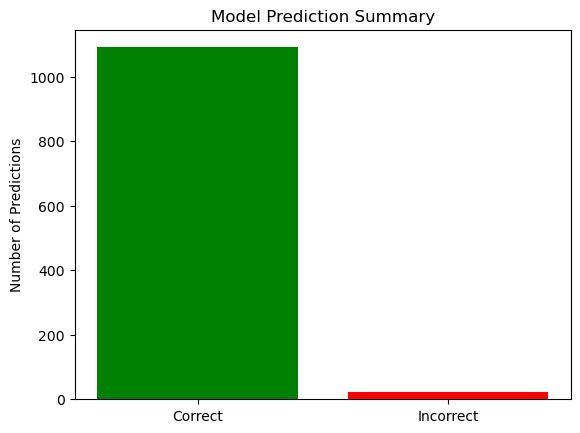

In [16]:
correct = (y_pred == y_test).sum()
incorrect = (y_pred != y_test).sum()

plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Model Prediction Summary')
plt.ylabel('Number of Predictions')
plt.show()
